In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [67]:
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [68]:
PATH = "../Datasets/"

In [69]:
df = pd.read_csv(PATH + "Complete.csv")
df["Time"] = pd.to_datetime(df["Time"])

In [70]:
df.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,City
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17659 entries, 0 to 17658
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        17659 non-null  datetime64[ns]
 1   O3_flag     15250 non-null  object        
 2   SO2_flag    15250 non-null  object        
 3   NO2_flag    15250 non-null  object        
 4   NO_flag     15250 non-null  object        
 5   CO_flag     15250 non-null  object        
 6   PM10_flag   15250 non-null  object        
 7   PM2.5_flag  15250 non-null  object        
 8   WDir_Avg    14337 non-null  float64       
 9   Rain_Tot    17659 non-null  float64       
 10  WDir_SD     16559 non-null  float64       
 11  O3          13079 non-null  float64       
 12  SO2         6214 non-null   float64       
 13  NO2         6312 non-null   float64       
 14  NO          5320 non-null   float64       
 15  CO          8817 non-null   float64       
 16  PM10        12783 non-

In [72]:
def null_matrix(df:pd.DataFrame):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), 
                cbar=False, 
                cmap=["#2E8B57", "#E8F5E9"],  
                yticklabels=False)  

    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Instances", fontsize=12)
    plt.title("Null-data matrix for RUOA database", fontsize=14)

    plt.tight_layout()
    plt.show()

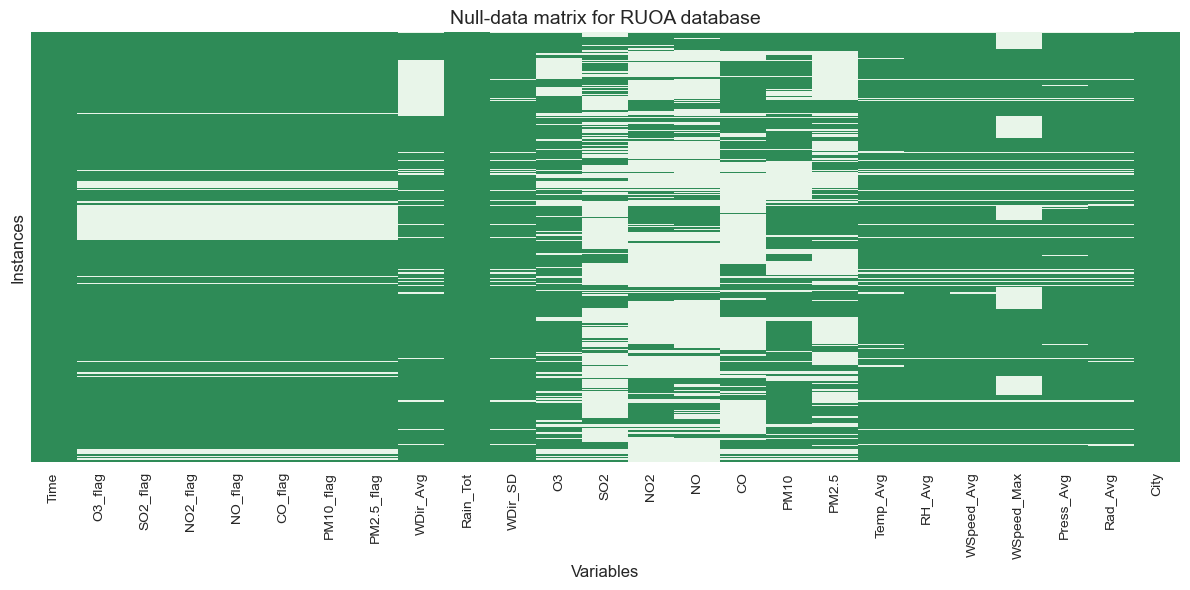

In [73]:
null_matrix(df)

In [74]:
def flags(df:pd.DataFrame):
    variables = ["O3", "SO2", "NO2", "NO", "CO", "PM10", "PM2.5"]
    for v in variables:
        df.loc[(df[v + "_flag"].isnull()) & (df[v].isnull()), v + "_flag"] = "OS"
        df.loc[(df[v + "_flag"].isnull()) & (df[v].isna()), v + "_flag"] = "OS"
        df.loc[(df[v + "_flag"].isnull()) & (df[v].notnull()), v + "_flag"] = "OK"
        df.loc[(df[v + "_flag"] == "OS") & (df[v].notnull()), v + "_flag"] = "OK"

In [75]:
flags(df)

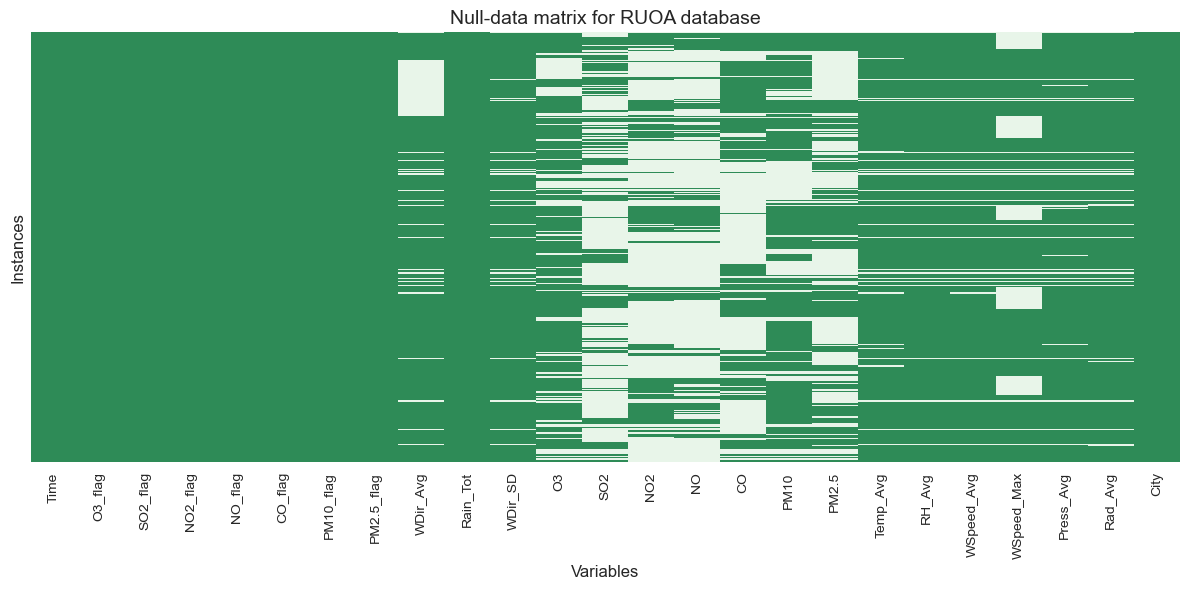

In [76]:
null_matrix(df)

In [77]:
def wind_speed_max(df:pd.DataFrame):
    df.loc[df["WSpeed_Avg"].notnull() & df["WSpeed_Max"].isnull(), "WSpeed_Max"] = df.loc[df["WSpeed_Avg"].notnull() & df["WSpeed_Max"].isnull(), "WSpeed_Avg"]

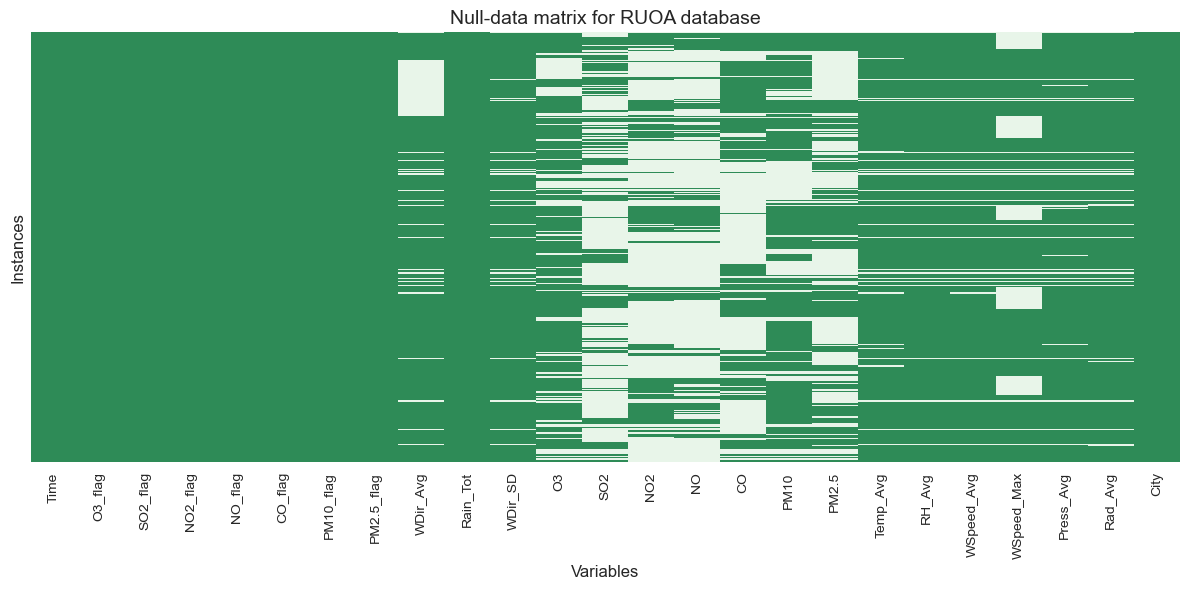

In [78]:
null_matrix(df)

# K-Nearest Neighbors Imputation

In [81]:
def knn_imputation(df:pd.DataFrame, n:int):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric_cols = df.columns.difference(numeric_cols).tolist()
    
    if not numeric_cols: return df
    
    df_numeric = df[numeric_cols].copy()
    df_non_numeric = df[non_numeric_cols].copy()

    ss = StandardScaler()
    ss_data = ss.fit_transform(df_numeric)

    model_imputer = KNNImputer(n_neighbors=n)
    imputed_data = model_imputer.fit_transform(ss_data)

    imputed_data = ss.inverse_transform(imputed_data)

    df_imputed_numeric = pd.DataFrame(imputed_data, columns=numeric_cols, index=df.index)
    df_final = pd.concat([df_imputed_numeric, df_non_numeric], axis=1)

    df_final = df_final[df.columns]

    return df_final

In [82]:
df_sin_nulos = knn_imputation(df, 10)

In [83]:
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17659 entries, 0 to 17658
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        17659 non-null  datetime64[ns]
 1   O3_flag     17659 non-null  object        
 2   SO2_flag    17659 non-null  object        
 3   NO2_flag    17659 non-null  object        
 4   NO_flag     17659 non-null  object        
 5   CO_flag     17659 non-null  object        
 6   PM10_flag   17659 non-null  object        
 7   PM2.5_flag  17659 non-null  object        
 8   WDir_Avg    17659 non-null  float64       
 9   Rain_Tot    17659 non-null  float64       
 10  WDir_SD     17659 non-null  float64       
 11  O3          17659 non-null  float64       
 12  SO2         17659 non-null  float64       
 13  NO2         17659 non-null  float64       
 14  NO          17659 non-null  float64       
 15  CO          17659 non-null  float64       
 16  PM10        17659 non-

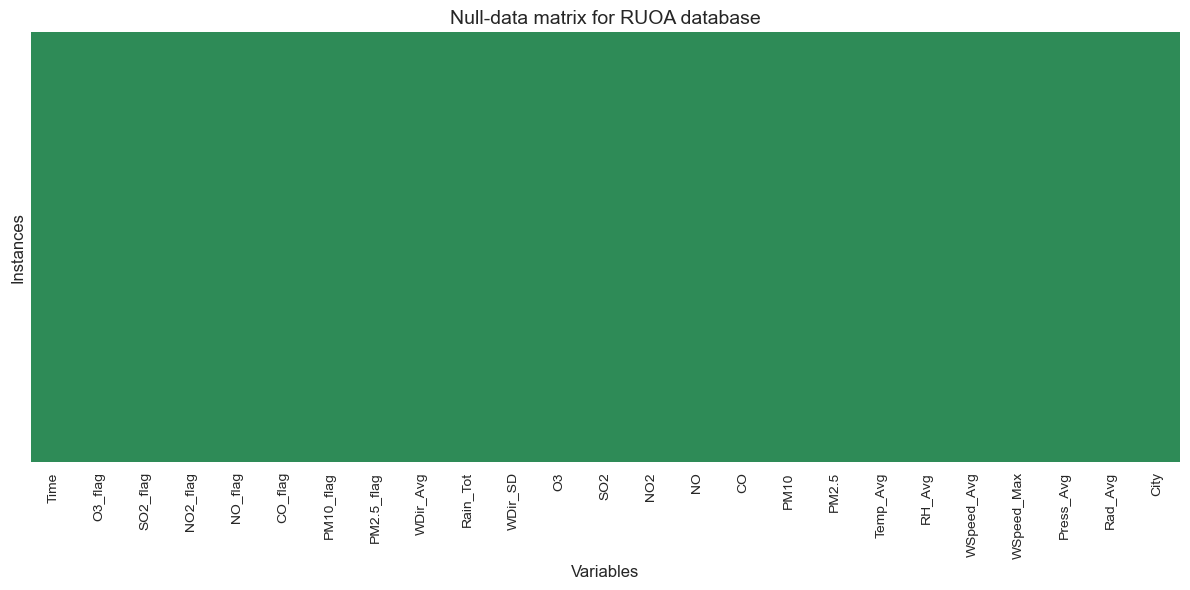

In [84]:
null_matrix(df_sin_nulos)

In [85]:
df_sin_nulos.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,City
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,231.0,0.0,9.245105,10.530265,2.187483,15.342077,4.907591,2.880084,29.414637,8.521722,18.655384,22.909487,2.357147,2.801363,987.308333,207.909743,Morelia
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,231.0,0.0,9.245105,10.530265,2.187483,15.342077,4.907591,2.880084,29.414637,8.521722,18.655384,22.909487,2.357147,2.801363,987.308333,207.909743,Morelia
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,231.0,0.0,9.245105,10.530265,2.187483,15.342077,4.907591,2.880084,29.414637,8.521722,18.655384,22.909487,2.357147,2.801363,987.308333,207.909743,Morelia
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,231.0,0.0,9.245105,10.530265,2.187483,15.342077,4.907591,2.880084,29.414637,8.521722,18.655384,22.909487,2.357147,2.801363,987.308333,207.909743,Morelia
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,231.0,0.0,9.245105,10.530265,2.187483,15.342077,4.907591,2.880084,29.414637,8.521722,18.655384,22.909487,2.357147,2.801363,987.308333,207.909743,Morelia


In [86]:
df.head()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,City
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morelia


In [89]:
df.describe()

,Time,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg
count,17659,14337.000000,17659.000000,16559.000000,13079.000000,6214.000000,6312.000000,5320.000000,8817.000000,12783.000000,8941.000000,16312.000000,16541.000000,16408.000000,12746.000000,16267.000000,16413.000000
mean,2020-03-08 07:57:12.017668096,134.666876,1.470163,9.330753,27.768198,2.701102,16.328259,7.744172,1.538945,26.673013,12.778021,21.368432,54.637390,2.655819,5.422794,886.835228,241.566018
min,2015-01-01 00:00:00,1.000000,0.000000,0.000000,0.031215,0.500090,0.400333,0.400979,0.040938,4.026741,4.000237,-5.289665,0.370906,0.000000,0.134989,798.316667,0.007265
25%,2017-10-07 00:00:00,62.000000,0.000000,7.628908,18.235243,0.747719,3.878608,1.206007,0.349035,16.547006,8.327241,17.455012,39.713451,1.988914,2.521007,808.207292,196.882456
50%,2020-03-08 00:00:00,110.000000,0.000000,9.576153,27.047708,1.044917,6.283573,2.838958,0.717109,23.034111,10.886770,20.414795,57.279247,2.534651,3.239003,824.066447,244.668890
75%,2022-08-07 12:00:00,216.000000,0.000000,11.123955,35.737340,1.449443,11.753903,5.403819,2.307833,33.626899,14.848610,25.799670,70.416604,3.173189,4.094932,989.848260,293.409562
max,2025-01-31 00:00:00,359.000000,246.900000,23.282412,200.906028,354.774889,291.345201,485.251049,19.660000,377.510000,334.872146,43.740722,99.977264,192.810895,1000.000000,1027.274306,816.937879
std,NaN,87.861835,6.061294,2.786441,13.981706,11.976212,32.067109,28.306083,1.765467,15.689099,9.748237,5.809115,19.966356,1.758157,43.842171,91.725534,69.362942


In [90]:
df_sin_nulos.sort_values(by="Time", inplace=True)

In [91]:
df_sin_nulos.tail()

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,City
10439,2025-01-30,OK,OK,OK,OK,OK,OK,OK,112.0,0.0,5.146267,20.541425,5.065877,7.661748,0.885363,3.757100,22.731707,16.610465,26.134757,73.853882,4.871190,6.460604,1013.101124,241.843661,Merida
14101,2025-01-31,OK,OK,OK,OK,OK,OK,OK,112.0,0.0,9.897097,15.801904,1.627163,29.483512,3.219410,0.317516,17.157550,10.620424,11.098347,34.232810,1.860380,2.395785,996.695074,190.269998,Hermosillo
7099,2025-01-31,OK,OK,OK,OK,OK,OK,OK,136.0,0.0,10.953774,20.853511,0.747329,4.958138,16.934628,6.158752,23.769645,15.189130,13.353388,41.994628,1.118355,1.347769,807.168331,274.312658,Juriquilla
10440,2025-01-31,OK,OK,OK,OK,OK,OK,OK,120.0,0.0,4.263211,35.457838,1.346549,23.093865,34.347410,2.855286,17.479316,9.359821,24.591818,92.437190,5.043248,6.588760,1012.406240,182.720264,Merida
17658,2025-01-31,OK,OK,OK,OK,OK,OK,OK,11.0,0.0,9.785698,27.560164,0.777655,4.808547,1.169518,0.282325,19.656786,15.168939,11.767785,38.540104,2.287261,2.961611,826.342312,204.394608,Saltillo


In [92]:
df_sin_nulos.to_csv(PATH + "DatasetAfterImputation.csv", index=False)